In [24]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
random_range = numpy.random

#Assigning values to some parameters
learning_rate = 0.01
step_size = 50
epochs = 1000

#Training Data
#train_X = numpy.asarray([1.2,7.2,1.3,7.9,10.657,12.458,2.365,8.54,9.145,10.187,7.1])
#train_Y = numpy.asarray([2.5,4.7,3.1,4.2,5.10,4.1,7.12,9.14,9.52,10.45,7.65])

#The data for train and test can be done using random function as well
train_X = numpy.asarray(random_range.random(100))
train_Y = numpy.asarray(random_range.random(100))

print(train_X)
print(train_Y)

samples = train_X.shape[0]
print(samples)

[ 0.37673795  0.79399673  0.5281975   0.75099949  0.10661793  0.21138079
  0.362564    0.2071481   0.08682756  0.56475876  0.554763    0.31073532
  0.78073677  0.71706197  0.21578762  0.92920922  0.30023493  0.23331274
  0.96978299  0.63431616  0.33840504  0.64634437  0.37624265  0.4659918
  0.17051943  0.45926731  0.11181132  0.41635172  0.08483889  0.08595897
  0.01890301  0.03542813  0.45374747  0.99900392  0.91283163  0.26216754
  0.84132868  0.35193247  0.23776864  0.16644784  0.43258504  0.24054356
  0.43954906  0.82971858  0.07594221  0.55748596  0.05748654  0.85623574
  0.91561461  0.50899984  0.03749468  0.52737827  0.62196898  0.23631312
  0.27159319  0.25386902  0.52698492  0.37314166  0.07313649  0.68918701
  0.49357337  0.76246551  0.16799511  0.6795967   0.03426025  0.87754996
  0.61756025  0.750202    0.78395547  0.07008696  0.13454892  0.03045845
  0.88430143  0.9421805   0.09907879  0.37005169  0.10788606  0.05341047
  0.65906485  0.65036748  0.89871461  0.25354165  0.

In [27]:
# Input to the Graph
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Setting the weights for the model
W = tf.Variable(random_range.random(), name="weight")
b = tf.Variable(random_range.random(), name="bias")

linear_model = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(linear_model-Y, 2))/(2*samples)

# Gradient descent
gradient_descent_optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 0050 cost= 0.089683078 W= 0.584286 b= 0.479884
Epoch: 0100 cost= 0.060524512 W= 0.5175 b= 0.381344
Epoch: 0150 cost= 0.051430929 W= 0.474213 b= 0.330806
Epoch: 0200 cost= 0.048340220 W= 0.443984 b= 0.306363
Epoch: 0250 cost= 0.047061864 W= 0.421102 b= 0.296056
Epoch: 0300 cost= 0.046346530 W= 0.402447 b= 0.293364
Epoch: 0350 cost= 0.045820694 W= 0.386306 b= 0.294729
Epoch: 0400 cost= 0.045371741 W= 0.371736 b= 0.298214
Epoch: 0450 cost= 0.044964846 W= 0.358217 b= 0.302763
Epoch: 0500 cost= 0.044588517 W= 0.345459 b= 0.307806
Epoch: 0550 cost= 0.044238061 W= 0.333297 b= 0.313032
Epoch: 0600 cost= 0.043911036 W= 0.321633 b= 0.318273
Epoch: 0650 cost= 0.043605674 W= 0.310412 b= 0.323445
Epoch: 0700 cost= 0.043320514 W= 0.299594 b= 0.3285
Epoch: 0750 cost= 0.043054178 W= 0.289155 b= 0.333416
Epoch: 0800 cost= 0.042805403 W= 0.279073 b= 0.338183
Epoch: 0850 cost= 0.042573065 W= 0.269335 b= 0.342801
Epoch: 0900 cost= 0.042356081 W= 0.259927 b= 0.347269
Epoch: 0950 cost= 0.042153448 W=

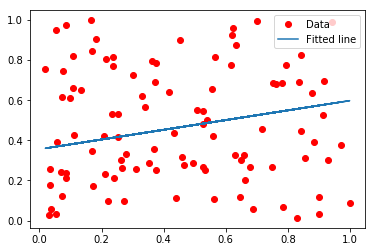

In [28]:
# Initialize the variables to the default values
initialization = tf.global_variables_initializer()

# Start training
with tf.Session() as session:
    session.run(initialization)

    # Fit all training data
    for epoch in range(epochs):
        for (x, y) in zip(train_X, train_Y):
            session.run(gradient_descent_optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % step_size == 0:
            c = session.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:",'%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", session.run(W), "b=", session.run(b))
    print("-------------------------------------------------------")
    print("Optimization Finished!")
    print("-------------------------------------------------------")
    training_cost = session.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", session.run(W), "b=", session.run(b), '\n')

    #PLotting a graphs
    plt.plot(train_X, train_Y, 'ro', label='Data')
    plt.plot(train_X, session.run(W) * train_X + session.run(b), label='Fitted line')
    plt.legend()
    plt.show()